In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import networkx as nx
import community as louvain
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("data\PaySim.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [8]:
print(df.shape)
df.isnull().sum()

(6362620, 11)


step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [14]:
fraud_counts = df['isFraud'].value_counts()
print(fraud_counts)

isFraud
0    6354407
1       8213
Name: count, dtype: int64


In [15]:
print(f"% fraud count = {fraud_counts[1]/(fraud_counts[0]+fraud_counts[1]) * 100}")

% fraud count = 0.12908204481801522


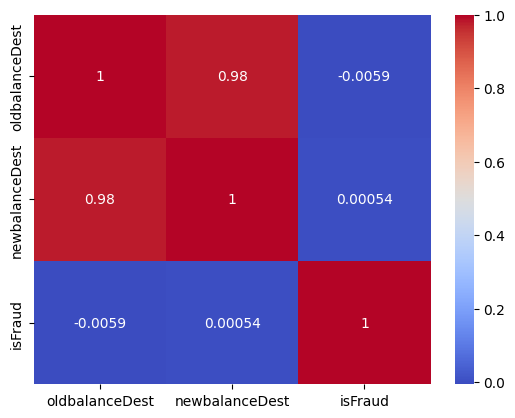

In [21]:
correlation_matrix = df[['oldbalanceDest', 'newbalanceDest', 'isFraud']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [34]:
processed_df = df.copy()
processed_df['balanceDiffOrig'] = processed_df['newbalanceOrig'] - processed_df['oldbalanceOrg']
processed_df['balanceDiffDest'] = processed_df['newbalanceDest'] - processed_df['oldbalanceDest']
processed_df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0,-9839.64,0.00
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0,-1864.28,0.00
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0,-181.00,0.00
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0,-181.00,-21182.00
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0,-11668.14,0.00
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0,-7817.71,0.00
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0,-7107.77,0.00
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0,-7861.64,0.00
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0,-2671.00,0.00
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0,-5337.77,-1549.21


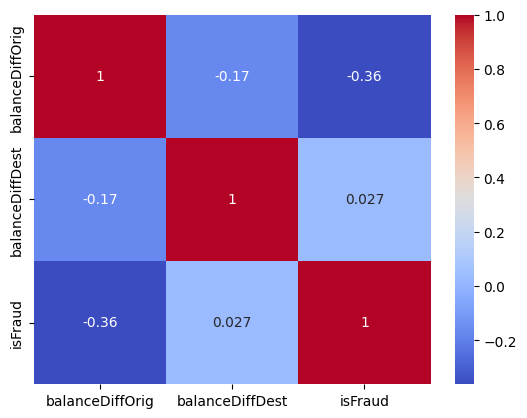

In [35]:
correlation_matrix = processed_df[['balanceDiffOrig', 'balanceDiffDest', 'isFraud']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [36]:
processed_df.drop(columns=['balanceDiffDest', 'oldbalanceDest', 'newbalanceDest'], inplace=True)
processed_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,isFraud,isFlaggedFraud,balanceDiffOrig
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0,0,-9839.64
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0,0,-1864.28
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,1,0,-181.00
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,1,0,-181.00
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0,0,-11668.14


In [37]:
import os
from dotenv import load_dotenv

load_dotenv()

# Neo4j Connection
NEO4J_URI = os.getenv("NEO4J_URI")
NEO4J_USER = os.getenv("NEO4J_USER")
NEO4J_PASSWORD = os.getenv("NEO4J_PASSWORD")

In [38]:
from py2neo import Graph, Node, Relationship, NodeMatcher

def connectToNeo4j():
    try:
        graph = Graph(NEO4J_URI, auth=(NEO4J_USER, NEO4J_PASSWORD))
        print("Connected to Neo4j database")
        return graph
    except Exception as e:
        print(f"Failed to connect: {e}")
        return None

In [39]:
graph = connectToNeo4j()
print(graph)

Connected to Neo4j database
Graph('bolt://localhost:7687')


In [40]:
sample_size = 100000

fraud_df = processed_df[processed_df['isFraud'] == 1].copy()
non_fraud_df = processed_df[processed_df['isFraud'] == 0].sample(n=min(sample_size - len(fraud_df), len(processed_df[processed_df['isFraud'] == 0])), random_state=42)
processed_df = pd.concat([fraud_df, non_fraud_df]).reset_index(drop=True)
print(f"Using sample of {len(df)} transactions ({len(fraud_df)} fraudulent)")
processed_df.head()

Using sample of 6362620 transactions (8213 fraudulent)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,isFraud,isFlaggedFraud,balanceDiffOrig
0,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,1,0,-181.0
1,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,1,0,-181.0
2,1,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,1,0,-2806.0
3,1,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,1,0,-2806.0
4,1,TRANSFER,20128.0,C137533655,20128.0,0.0,C1848415041,1,0,-20128.0


In [43]:
processed_df.head()
print(processed_df.shape)

(100000, 10)


In [44]:
import time
from py2neo.bulk import create_nodes, create_relationships
import tqdm

# Knowledge Graph construction
def clear_database(graph):
    print("Clearing existing database...")
    graph.run("MATCH (n) DETACH DELETE n")

def create_schema_constraints(graph):
    print("Creating schema constraints...")
    # Create constraints (makes insertion and querying faster)
    try:
        graph.run("CREATE CONSTRAINT client_id IF NOT EXISTS FOR (c:Entity) REQUIRE c.id IS UNIQUE")
    except Exception as e:
        print(f"Error creating constraints: {e}")

def build_knowledge_graph(graph, df):
    """Build knowledge graph with entities (clients/merchants) as nodes and transactions as edges"""
    print("Building knowledge graph in Neo4j...")
    
    # Create constraints and indexes
    create_schema_constraints(graph)
    
    # Start timer to track processing time
    start_time = time.time()
    
    # 1. Create entity nodes (clients and merchants)
    print("Creating entity nodes...")
    
    # Get unique entities (both originators and destinations)
    originator_entities = set(df['nameOrig'].unique())
    destination_entities = set(df['nameDest'].unique())
    all_entities = originator_entities.union(destination_entities)
    
    # Prepare data for bulk insertion
    entity_data = [
        {"id": entity, 
         "is_originator": entity in originator_entities, 
         "is_destination": entity in destination_entities,
         "entity_type": "Client" if entity.startswith("C") else "Merchant"
        }
        for entity in all_entities
    ]
    
    # Bulk create entity nodes (500 at a time to avoid memory issues)
    batch_size = 500
    for i in range(0, len(entity_data), batch_size):
        batch = entity_data[i:i+batch_size]
        create_nodes(graph.auto(), batch, labels={"Entity"})
    
    # 2. Create transaction edges directly between entities
    print("Creating transaction edges...")
    
    # Process in batches to avoid memory issues
    batch_size = 1000
    total_batches = (len(df) + batch_size - 1) // batch_size
    
    for batch_idx in tqdm.tqdm(range(total_batches)):
        start_idx = batch_idx * batch_size
        end_idx = min((batch_idx + 1) * batch_size, len(df))
        batch_df = df.iloc[start_idx:end_idx]
        
        # Use Cypher for batch transaction creation
        # This creates TRANSACTION edges between entities with all transaction properties
        tx_data = []
        for idx, row in batch_df.iterrows():
            tx_data.append({
                "from": row['nameOrig'],
                "to": row['nameDest'],
                "tx_id": int(idx),
                "step": int(row['step']),
                "type": row['type'],
                "amount": float(row['amount']),
                "is_fraud": bool(row['isFraud']),
                "is_flagged_fraud": bool(row['isFlaggedFraud']),
                "orig_old_balance": float(row['oldbalanceOrg']),
                "orig_new_balance": float(row['newbalanceOrig']),
                # "dest_old_balance": float(row['oldbalanceDest']),
                # "dest_new_balance": float(row['newbalanceDest'])
            })
        
        # Process in smaller chunks for the transaction edges
        tx_batch_size = 200
        for i in range(0, len(tx_data), tx_batch_size):
            tx_batch = tx_data[i:i+tx_batch_size]
            
            # Use a parameterized Cypher query for creating edges in batches
            query = """
            UNWIND $transactions AS tx
            MATCH (from:Entity {id: tx.from})
            MATCH (to:Entity {id: tx.to})
            CREATE (from)-[r:TRANSACTION {
                tx_id: tx.tx_id,
                step: tx.step,
                type: tx.type,
                amount: tx.amount,
                is_fraud: tx.is_fraud,
                is_flagged_fraud: tx.is_flagged_fraud,
                orig_old_balance: tx.orig_old_balance,
                orig_new_balance: tx.orig_new_balance,
                orig_balance_diff: tx.orig_new_balance - tx.orig_old_balance,
                timestamp: datetime({epochmillis: tx.step * 3600000})
            }]->(to)
            """
            graph.run(query, parameters={"transactions": tx_batch})
    
    # Create aggregate relationships (optional but useful)
    print("Creating aggregate relationships...")
    
    # This creates TRANSFERS_TO relationships that summarize all transactions between entity pairs
    graph.run("""
    MATCH (e1:Entity)-[t:TRANSACTION]->(e2:Entity)
    WITH e1, e2, 
         collect(t) as transactions,
         sum(t.amount) as total_amount,
         count(t) as tx_count,
         sum(CASE WHEN t.is_fraud THEN 1 ELSE 0 END) as fraud_count
    MERGE (e1)-[r:TRANSFERS_TO]->(e2)
    SET r.tx_count = tx_count,
        r.total_amount = total_amount,
        r.fraud_count = fraud_count,
        r.fraud_ratio = toFloat(fraud_count) / tx_count,
        r.avg_amount = total_amount / tx_count
    """)
    
    # Update entity nodes with aggregate metrics
    print("Calculating entity metrics...")
    
    # Calculate transaction counts, fraud counts, etc. for each entity
    graph.run("""
    MATCH (e:Entity)
    OPTIONAL MATCH (e)-[t:TRANSACTION]->()
    WITH e, count(t) as outgoing_count, 
         sum(CASE WHEN t.is_fraud THEN 1 ELSE 0 END) as outgoing_fraud_count,
         sum(t.amount) as outgoing_total
    OPTIONAL MATCH ()-[t2:TRANSACTION]->(e)
    WITH e, outgoing_count, outgoing_fraud_count, outgoing_total,
         count(t2) as incoming_count,
         sum(CASE WHEN t2.is_fraud THEN 1 ELSE 0 END) as incoming_fraud_count,
         sum(t2.amount) as incoming_total
    SET e.outgoing_tx_count = outgoing_count,
        e.outgoing_fraud_count = outgoing_fraud_count,
        e.outgoing_fraud_ratio = CASE WHEN outgoing_count > 0 THEN toFloat(outgoing_fraud_count) / outgoing_count ELSE 0 END,
        e.outgoing_total = outgoing_total,
        e.incoming_tx_count = incoming_count,
        e.incoming_fraud_count = incoming_fraud_count,
        e.incoming_fraud_ratio = CASE WHEN incoming_count > 0 THEN toFloat(incoming_fraud_count) / incoming_count ELSE 0 END,
        e.incoming_total = incoming_total,
        e.total_tx_count = outgoing_count + incoming_count,
        e.total_fraud_count = outgoing_fraud_count + incoming_fraud_count,
        e.total_fraud_ratio = CASE WHEN (outgoing_count + incoming_count) > 0 
                              THEN toFloat(outgoing_fraud_count + incoming_fraud_count) / (outgoing_count + incoming_count) 
                              ELSE 0 END
    """)
    
    # Calculate time metrics
    elapsed_time = time.time() - start_time
    print(f"Knowledge graph construction completed in {elapsed_time:.2f} seconds")
    
    # Return statistics
    stats = {
        "entity_count": len(all_entities),
        "transaction_count": len(df),
        "elapsed_time": elapsed_time
    }
    
    return stats

In [45]:
clear_database(graph)
build_knowledge_graph(graph, processed_df)

Clearing existing database...
Building knowledge graph in Neo4j...
Creating schema constraints...
Creating entity nodes...
Creating transaction edges...


100%|██████████| 100/100 [00:19<00:00,  5.06it/s]


Creating aggregate relationships...
Calculating entity metrics...
Knowledge graph construction completed in 48.53 seconds


{'entity_count': 193127,
 'transaction_count': 100000,
 'elapsed_time': 48.528457164764404}

In [46]:
# Option 1: NetworkX visualization from Neo4j data
def visualize_graph_from_neo4j(limit=100):
    """Visualize a sample of the graph using NetworkX"""
    # Query a subset of nodes and relationships
    query = f"""
    MATCH (n1:Entity)-[r:TRANSACTION]->(n2:Entity) 
    RETURN n1.id as source, n2.id as target, r.amount as weight, r.is_fraud as is_fraud
    LIMIT {limit}
    """
    results = graph.run(query).data()
    
    # Create a NetworkX graph
    G = nx.DiGraph()
    
    # Add edges with attributes
    for record in results:
        G.add_edge(
            record['source'], 
            record['target'], 
            weight=record['weight'],
            is_fraud=record['is_fraud']
        )
    
    # Set up the plot
    plt.figure(figsize=(12, 10))
    pos = nx.spring_layout(G, seed=42)  # Consistent layout
    
    # Draw edges with different colors based on fraud status
    edges = G.edges(data=True)
    fraud_edges = [(u, v) for u, v, d in edges if d['is_fraud']]
    normal_edges = [(u, v) for u, v, d in edges if not d['is_fraud']]
    
    # Draw nodes with different colors based on type (Client or Merchant)
    client_nodes = [node for node in G.nodes() if node.startswith('C')]
    merchant_nodes = [node for node in G.nodes() if node.startswith('M')]
    
    # Draw the graph elements
    nx.draw_networkx_nodes(G, pos, nodelist=client_nodes, node_color='lightblue', node_size=80, label='Clients')
    nx.draw_networkx_nodes(G, pos, nodelist=merchant_nodes, node_color='lightgreen', node_size=80, label='Merchants')
    nx.draw_networkx_edges(G, pos, edgelist=normal_edges, edge_color='gray', alpha=0.6, arrows=True, width=0.5)
    nx.draw_networkx_edges(G, pos, edgelist=fraud_edges, edge_color='red', alpha=0.8, arrows=True, width=1.5)
    
    # Add labels (limited to avoid clutter)
    selected_nodes = list(G.nodes())[:10]  # Just show a few labels
    labels = {node: node for node in selected_nodes}
    nx.draw_networkx_labels(G, pos, labels=labels, font_size=8)
    
    plt.title(f"Transaction Network (Sample of {limit} transactions)")
    plt.legend()
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# Option 2: Visualize entity metrics as a bar chart
def visualize_entity_metrics(top_n=20):
    """Visualize metrics for top entities by transaction count"""
    query = """
    MATCH (e:Entity)
    WHERE e.total_tx_count > 0
    RETURN e.id as entity_id, 
           e.entity_type as type,
           e.total_tx_count as tx_count, 
           e.total_fraud_ratio as fraud_ratio,
           e.outgoing_total as sent,
           e.incoming_total as received
    ORDER BY e.total_tx_count DESC
    LIMIT $top_n
    """
    results = graph.run(query, top_n=top_n).data()
    df = pd.DataFrame(results)
    
    # Create visualizations
    fig, axes = plt.subplots(2, 1, figsize=(14, 12))
    
    # Transaction counts
    sns.barplot(x='entity_id', y='tx_count', hue='type', data=df, ax=axes[0])
    axes[0].set_title(f'Top {top_n} Entities by Transaction Count')
    axes[0].set_xlabel('Entity ID')
    axes[0].set_ylabel('Transaction Count')
    axes[0].tick_params(axis='x', rotation=45)
    
    # Fraud ratio
    sns.barplot(x='entity_id', y='fraud_ratio', hue='type', data=df, ax=axes[1])
    axes[1].set_title(f'Fraud Ratio for Top {top_n} Entities')
    axes[1].set_xlabel('Entity ID')
    axes[1].set_ylabel('Fraud Ratio')
    axes[1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    # Additional plot for money flow
    plt.figure(figsize=(14, 6))
    df_melt = pd.melt(df, id_vars=['entity_id', 'type'], 
                    value_vars=['sent', 'received'],
                    var_name='direction', value_name='amount')
    
    sns.barplot(x='entity_id', y='amount', hue='direction', data=df_melt)
    plt.title(f'Money Flow for Top {top_n} Entities')
    plt.xlabel('Entity ID')
    plt.ylabel('Amount')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Option 3: Heatmap of fraud patterns
def visualize_fraud_patterns():
    """Visualize fraud patterns by transaction type and time step"""
    query = """
    MATCH ()-[t:TRANSACTION]->()
    RETURN t.step as step, t.type as tx_type, 
           COUNT(t) as tx_count,
           SUM(CASE WHEN t.is_fraud THEN 1 ELSE 0 END) as fraud_count,
           toFloat(SUM(CASE WHEN t.is_fraud THEN 1 ELSE 0 END)) / COUNT(t) as fraud_ratio
    ORDER BY step, tx_type
    """
    results = graph.run(query).data()
    df = pd.DataFrame(results)
    
    # Create a pivot table for the heatmap
    pivot_df = df.pivot_table(index='tx_type', columns='step', values='fraud_ratio', fill_value=0)
    
    plt.figure(figsize=(16, 6))
    sns.heatmap(pivot_df, cmap='YlOrRd', annot=False, fmt=".2f")
    plt.title('Fraud Ratio by Transaction Type and Time Step')
    plt.xlabel('Time Step')
    plt.ylabel('Transaction Type')
    plt.tight_layout()
    plt.show()



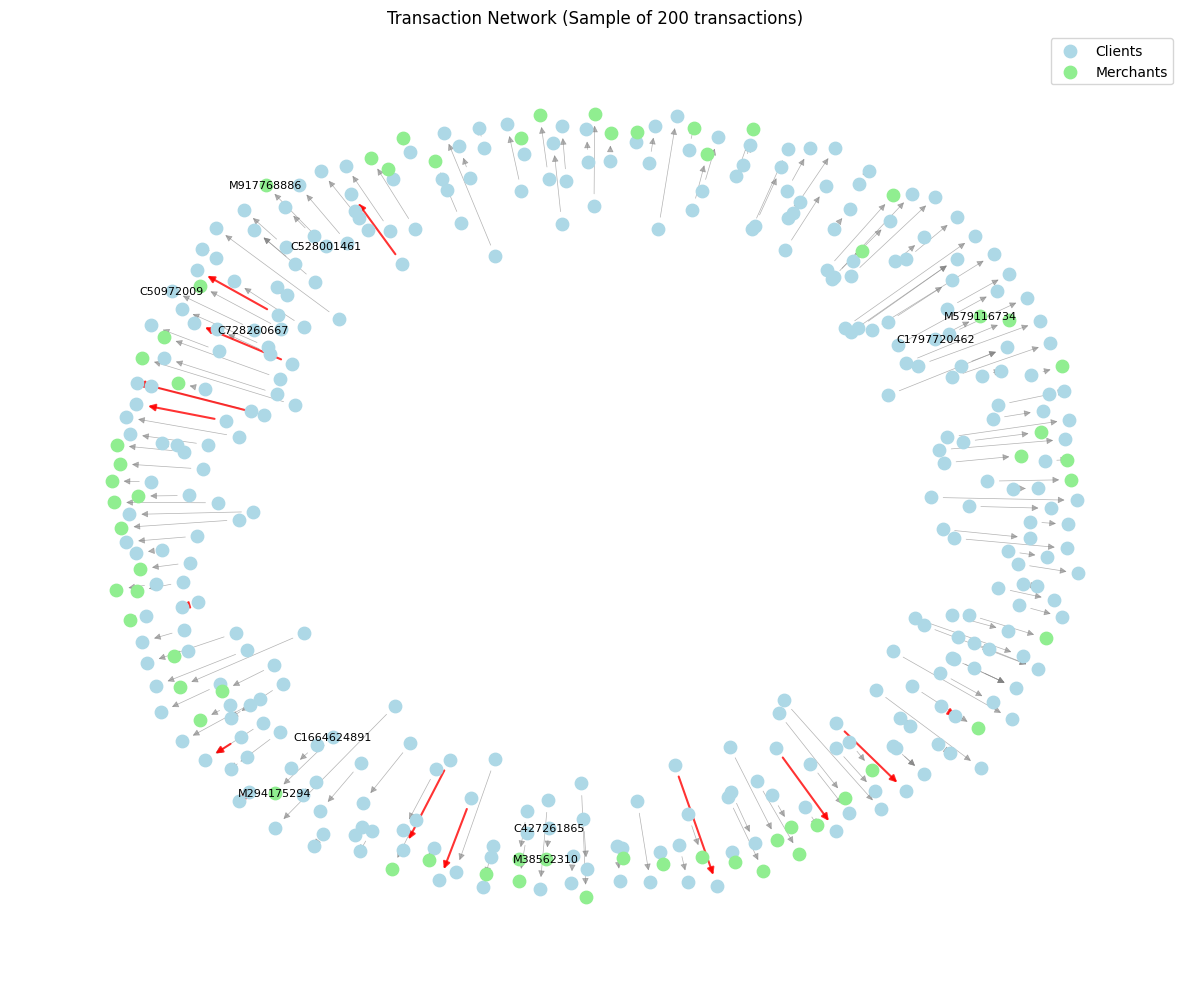

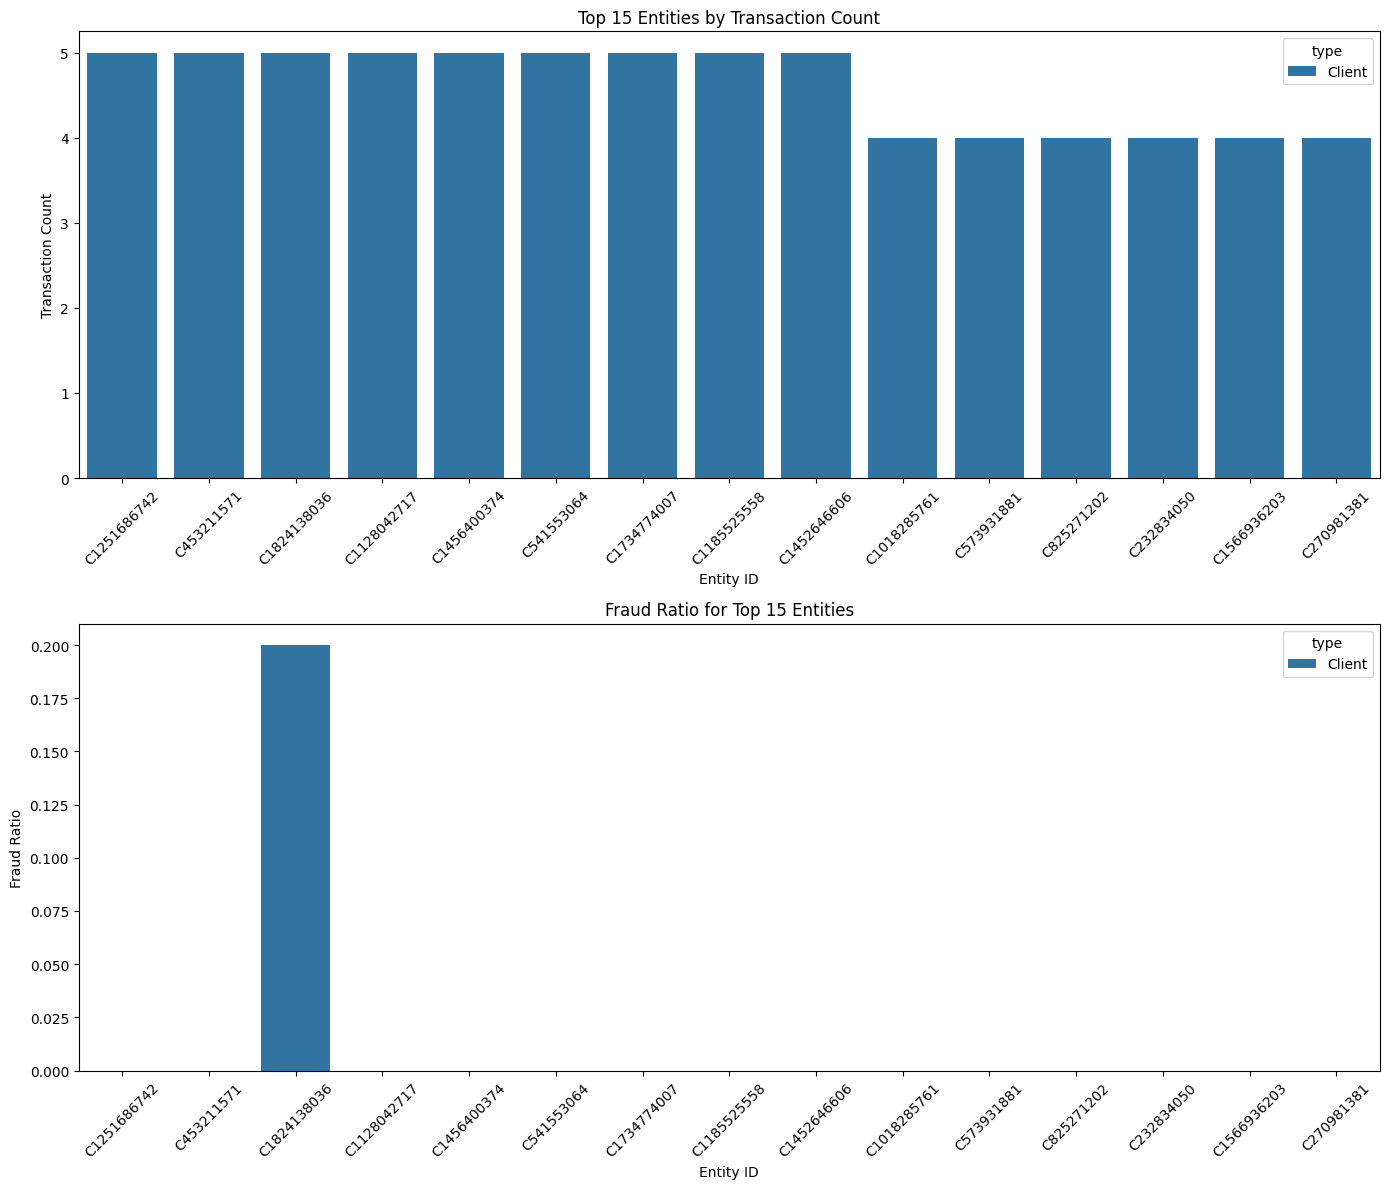

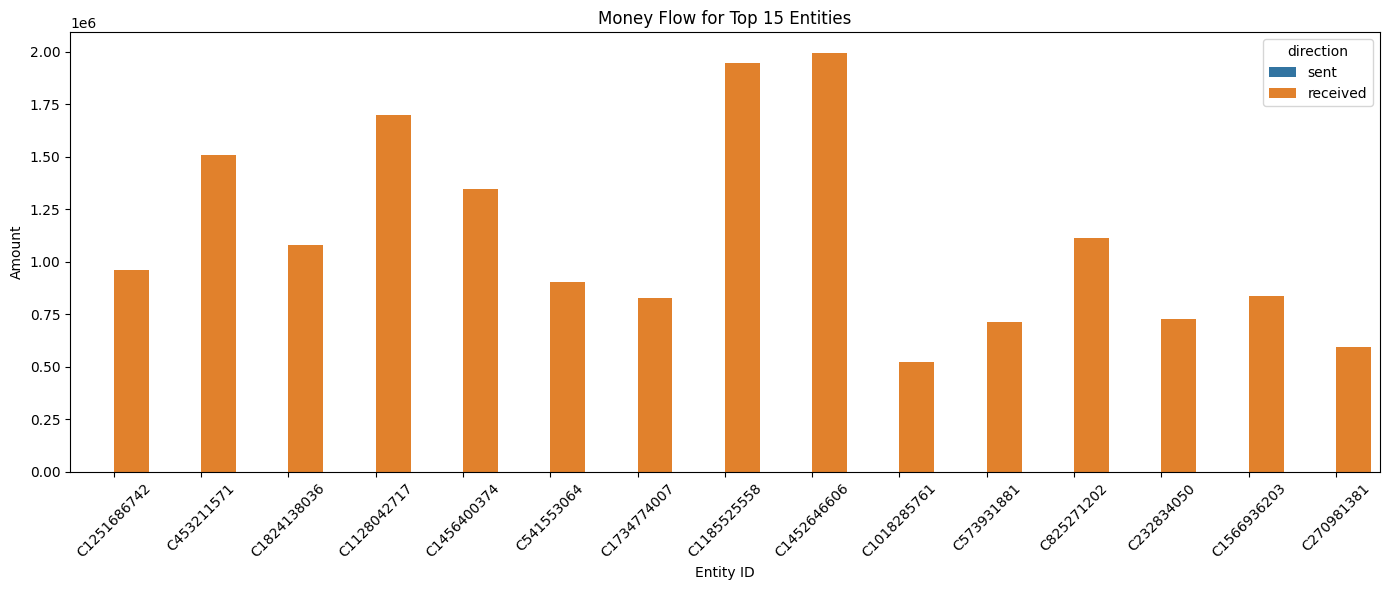

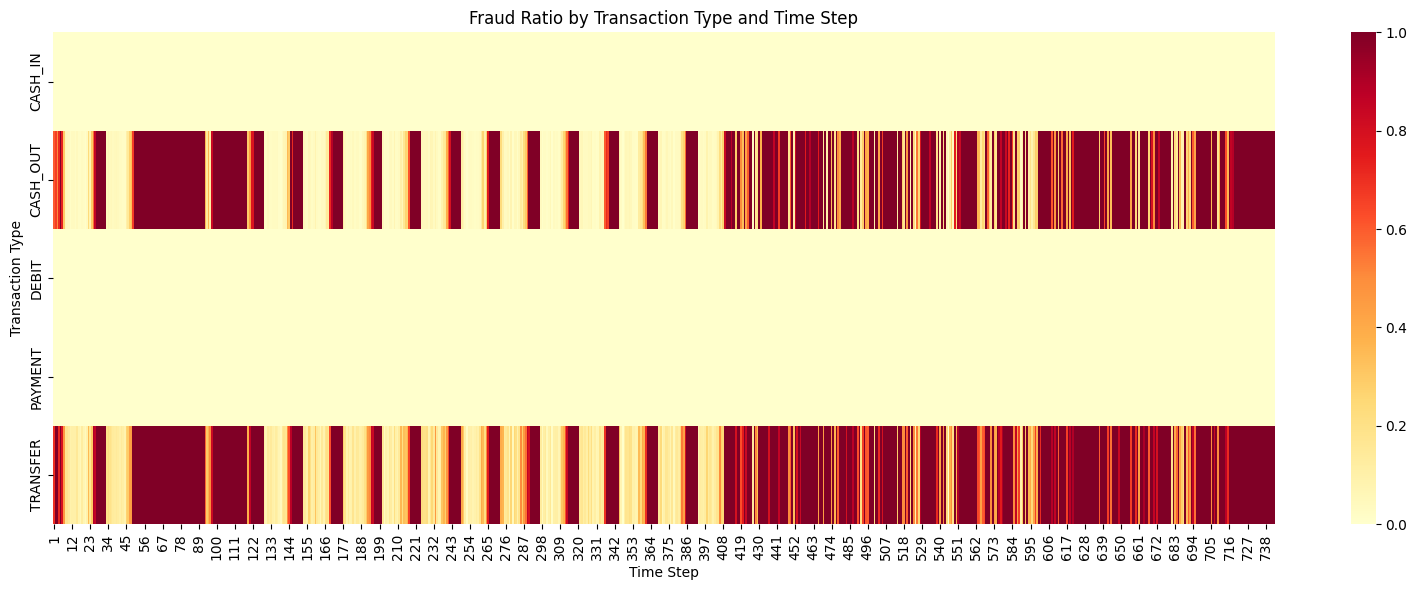

In [47]:
# Example usage:
visualize_graph_from_neo4j(limit=200)
visualize_entity_metrics(top_n=15)
visualize_fraud_patterns()